# Convolutional Neural Network Tutorial In Python

## 1. Tensorflow Basics

In [1]:
# Install Tensorflow
#!pip install tensorflow

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2023-04-05 13:08:55.933926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-05 13:08:55.933949: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow version: 2.9.1


### a. Tensors

In [2]:
# Zero dimensional tensor
zero_dim_tensor = tf.constant(20)
print(zero_dim_tensor)

# One dimensional tensor
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print(one_dim_tensor)

# Two dimensional tensor
two_dim_array = [[3, 6, 7, 5], 
                 [9, 2, 3, 4],
                 [7, 1, 10,6],
                 [0, 8, 11,2]]

two_dim_tensor = tf.constant(two_dim_array)
print(two_dim_tensor)

tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


2023-04-05 13:08:57.506770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-05 13:08:57.506796: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-05 13:08:57.506822: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9d68ee5a-20d2-4fb9-a157-74bb1773ba8f): /proc/driver/nvidia/version does not exist
2023-04-05 13:08:57.507172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Step-by-step implementation

### a. Load the dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [4]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

### b. Exploratory Data Analysis

In [5]:
# 1. Function for showing images
def show_images(train_images, 
                class_names, 
                train_labels, 
                nb_samples = 12, nb_row = 4):
    
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

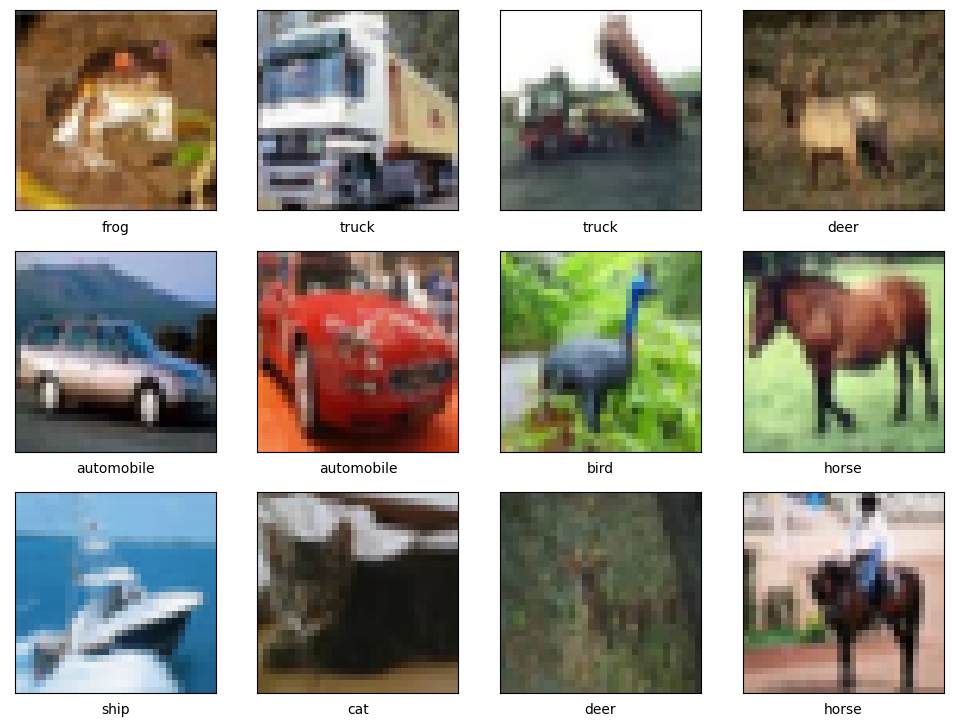

In [6]:
# Visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [7]:
from tensorflow.keras.utils import to_categorical

# Data normalization
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

## Model architecture

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Model training

In [10]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4472 - accuracy: 0.4792 - precision: 0.7063 - recall: 0.2495 - val_loss: 1.1459 - val_accuracy: 0.6025 - val_precision: 0.7682 - val_recall: 0.4056
Epoch 2/30
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0815 - accuracy: 0.6224 - precision: 0.7655 - recall: 0.4697 - val_loss: 1.0470 - val_accuracy: 0.6378 - val_precision: 0.7585 - val_recall: 0.5057
Epoch 3/30
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9424 - accuracy: 0.6709 - precision: 0.7878 - recall: 0.5529 - val_loss: 0.9599 - val_accuracy: 0.6659 - val_precision: 0.7713 - val_recall: 0.5643
Epoch 4/30
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8383 - accuracy: 0.7085 - precision: 0.8062 - recall: 0.6085 - val_loss: 0.9211 - val_accuracy: 0.6826 - val_precision: 0.7764 - val_recall: 0.5920
Epoch 5/30
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7563 - a

## Evaluate the model. 

In [25]:
import matplotlib.pyplot as plt
    
def show_performance_curve(training_result, metric, metric_label):
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf, 
                                                validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]
    
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
             xy=(intersection_idx, intersection_value),
             xycoords='data',
             fontsize=10,
             color='green')
                 
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

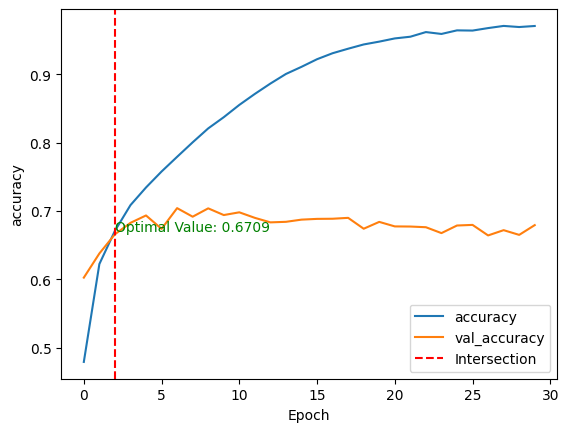

In [24]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
show_performance_curve(training_history, 'accuracy', 'accuracy')

In [27]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#show_performance_curve(training_history, 'accuracy', 'accuracy')

In [30]:
#show_performance_curve(training_history, 'recall', 'recall')

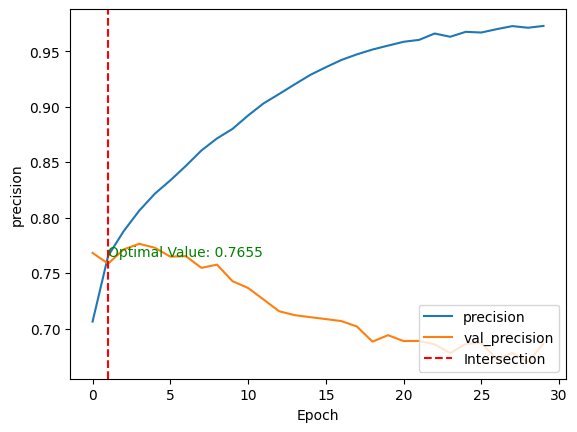

In [29]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 3s 8ms/step


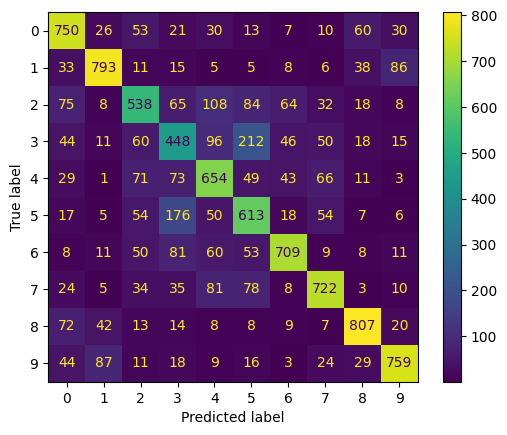

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()
